Here i 'll use a  [dataset](http://statsmodels.sourceforge.net/stable/datasets/generated/fair.html) packaged within Statsmodels. It is a data set from a 1974 survey of women by Redbook magazine. Married women were asked if they have had extramarital affairs. The published work on the data set can be found in:

[Fair, Ray. 1978. “A Theory of Extramarital Affairs,”`Journal of Political Economy`, February, 45-61.](http://fairmodel.econ.yale.edu/rayfair/pdf/1978a200.pdf)


#### DataSet Description

From the [Statsmodels website](http://statsmodels.sourceforge.net/stable/datasets/generated/fair.html) we have the following information about the data:

Number of observations: 6366
Number of variables: 9
Variable name definitions:

    rate_marriage   : How rate marriage, 1 = very poor, 2 = poor, 3 = fair,
                    4 = good, 5 = very good
    age             : Age
    yrs_married     : No. years married. Interval approximations. See
                    original paper for detailed explanation.
    children        : No. children
    religious       : How relgious, 1 = not, 2 = mildly, 3 = fairly,
                    4 = strongly
    educ            : Level of education, 9 = grade school, 12 = high
                    school, 14 = some college, 16 = college graduate,
                    17 = some graduate school, 20 = advanced degree
    occupation      : 1 = student, 2 = farming, agriculture; semi-skilled,
                    or unskilled worker; 3 = white-colloar; 4 = teacher
                    counselor social worker, nurse; artist, writers;
                    technician, skilled worker, 5 = managerial,
                    administrative, business, 6 = professional with
                    advanced degree
    occupation_husb : Husband's occupation. Same as occupation.
    affairs         : measure of time spent in extramarital affairs


In [1]:
# Data Imports
import pandas as pd
import numpy as np
from pandas import Series,DataFrame

# math
import math

# plot Imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Machine Larning Imports
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# For Evaluation
from sklearn import metrics

# Dataset Import
import statsmodels.api as sm

C:\Users\Administrator\Anaconda2\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
# Standard method of loading Statsmodels datasets into a pandas DataFrame. Note the name fair stands for 'affair' dataset.
df = sm.datasets.fair.load_pandas().data

In [3]:
# Preview
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


Let's go ahead and start our classfication by creating a new column called 'Had_Affair'. We will set this column equal to 0 if the affairs column is 0 (meaning no time spent in affairs) otherwise the 'Had_Affair' value will be set as 1, indicating that the woman had an affair.

In [4]:
# Create check function
def affair_check(x):
    if x != 0:
        return 1
    else:
        return 0

In [5]:
#apply above function on affairs column(series) of df and add new column 'Had_Affairs' 
df['Had_Affairs'] = df.affairs.apply(affair_check)

In [6]:
#df.head() 
df.tail()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,Had_Affairs
6361,5.0,32.0,13.0,2.0,3.0,17.0,4.0,3.0,0.0,0
6362,4.0,32.0,13.0,1.0,1.0,16.0,5.0,5.0,0.0,0
6363,5.0,22.0,2.5,0.0,2.0,14.0,3.0,1.0,0.0,0
6364,5.0,32.0,6.0,1.0,3.0,14.0,3.0,4.0,0.0,0
6365,4.0,22.0,2.5,0.0,2.0,16.0,2.0,4.0,0.0,0


In [7]:
# Groupby Had Affair column
df.groupby('Had_Affairs').mean()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
Had_Affairs,,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758,0.000000
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559,2.187243


Looking at this brief glance of the data, it seems that the women who had affairs were slightly older,married longer, and slightly less religious and less educated. However, the mean values of both classes are very close for all variables.

# EDA
Let's go ahead and try to visualize some of this data.

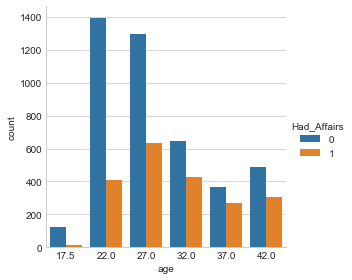

In [8]:
# Factorplot for age with Had Affair hue
sns.factorplot(x='age',data=df,hue='Had_Affairs',kind='count')

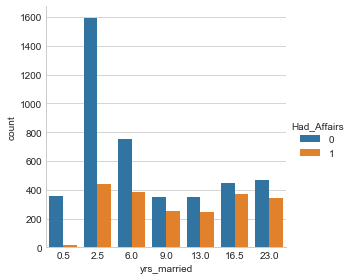

In [9]:
# Factorplot for years married with Had Affair hue
sns.factorplot('yrs_married',data=df,hue='Had_Affairs',kind='count')

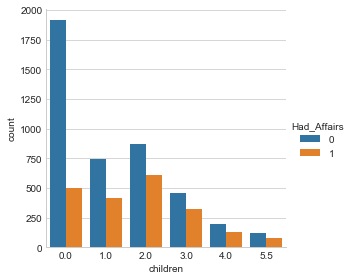

In [10]:
# Factorplot for #children  with Had Affair hue
sns.factorplot('children',data=df,hue='Had_Affairs',kind='count')

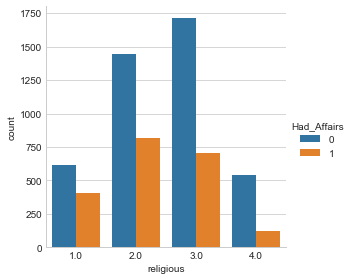

In [11]:
# Factorplot for religious with Had Affair hue
sns.factorplot('religious',data=df,hue='Had_Affairs',kind='count')

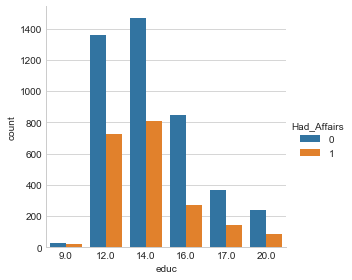

In [12]:
# Factorplot for education with Had Affair hue
sns.factorplot('educ',data=df,hue='Had_Affairs',kind='count')

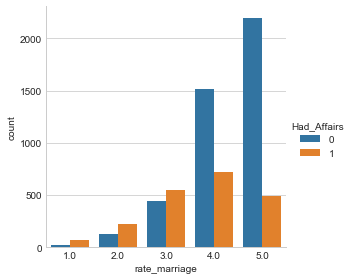

In [13]:
# Factorplot for rate_marriage  with Had Affair hue
sns.factorplot('rate_marriage',data=df,hue='Had_Affairs',kind='count')

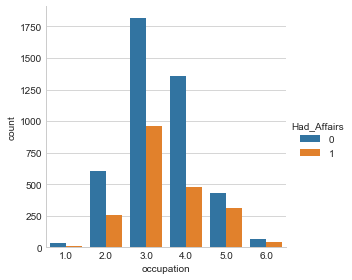

In [14]:
sns.factorplot('occupation',data=df,hue='Had_Affairs',kind='count')

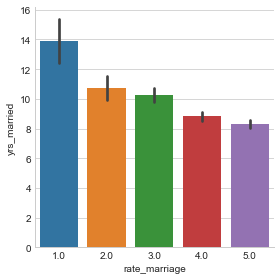

In [15]:
sns.factorplot(x='rate_marriage',y='yrs_married',data=df,kind='bar')

# Data Preparation

If we look at the data, we'll notice that two columns are unlike the others. Occupation and Husband's Occupation. These columns are in a format know as *Categorical Variables*. Basically they are in set quantity/category, so that 1.0 and 2.0 are seperate variables, not values along a spectrum that goes from 1-2 (e.g. There is no 1.5 for the occupation column). Pandas has a built-in method of getting [dummy variables](http://en.wikipedia.org/wiki/Dummy_variable_%28statistics%29) and creating new columns from them.

In [16]:
# Create new DataFrames for the Categorical Variables
occ_dummies = pd.get_dummies(df['occupation'],drop_first=True) #drop_first=True: to avoid Multicollinearity 
husb_occ_dummies = pd.get_dummies(df['occupation_husb'],drop_first=True)

# Create column names for the new DataFrames
occ_dummies.columns=['occ1','occ2','occ3','occ4','occ5']
husb_occ_dummies.columns=['hocc1','hocc2','hocc3','hocc4','hocc5']

In [17]:
occ_dummies.head()

,occ1,occ2,occ3,occ4,occ5
0,1,0,0,0,0
1,0,1,0,0,0
2,0,1,0,0,0
3,0,0,0,1,0
4,0,1,0,0,0


In [18]:
husb_occ_dummies.head()

,hocc1,hocc2,hocc3,hocc4,hocc5
0,0,0,0,1,0
1,0,0,1,0,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,1,0,0


In [19]:
# Concat the dummy DataFrames Together
dummies = pd.concat([occ_dummies,husb_occ_dummies],axis=1)

#Now we will create the X and Y data sets for out logistic regression!
#Set X as new DataFrame formed by concatinating df without the occupation ,affairs ,Y target and dummies

X = pd.concat([df.drop(['occupation','occupation_husb','affairs','Had_Affairs'],axis=1),dummies],axis=1)
Y=df.Had_Affairs

In [20]:
# Preview of Result
X.head()

,rate_marriage,age,yrs_married,children,religious,educ,occ1,occ2,occ3,occ4,occ5,hocc1,hocc2,hocc3,hocc4,hocc5
0,3.0,32.0,9.0,3.0,3.0,17.0,1,0,0,0,0,0,0,0,1,0
1,3.0,27.0,13.0,3.0,1.0,14.0,0,1,0,0,0,0,0,1,0,0
2,4.0,22.0,2.5,0.0,1.0,16.0,0,1,0,0,0,0,0,0,1,0
3,4.0,37.0,16.5,4.0,3.0,16.0,0,0,0,1,0,0,0,0,1,0
4,5.0,27.0,9.0,1.0,1.0,14.0,0,1,0,0,0,0,0,1,0,0


In [21]:
# Create LogisticRegression model
lg_model=LogisticRegression()

In [22]:
# Fit our data
lg_model.fit(X,Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [23]:
# Check our accuracy
lg_model.score(X,Y)

0.7260446120012567

In [24]:
Y.mean()

0.3224945020420987

In [25]:
Feat = DataFrame(X.columns,columns=['Features'])
Feat['Coefficient']=np.transpose(lg_model.coef_)

In [26]:
Feat

,Features,Coefficient
0,rate_marriage,-0.697739
1,age,-0.056329
2,yrs_married,0.103853
3,children,0.018107
4,religious,-0.367990
5,educ,0.009033
6,occ1,0.293794
7,occ2,0.604550
8,occ3,0.341839
9,occ4,0.938971


Looking at the coefficients we can see that a positive coeffecient corresponds to increasing the likelihood of having an affair while a negative coefficient means it corresponds to a decreased likelihood of having an affair as the actual data value point increases.

As you might expect, an increased marriage rating corresponded to a decrease in the likelihood of having an affair. Increased religiousness also seems to correspond to a decrease in the likelihood of having an affair.

Since all the dummy variables (the wife and husband occupations) are positive that means the lowest likelihood of having an affair corresponds to the baseline occupation we dropped (1-Student).

# Testing and Training Data Sets

In [27]:
# Split the data
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3)

In [28]:
# Split the data
lg_model2 = LogisticRegression()

In [29]:
# Now fit the new model
lg_model2.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [30]:
# Predict the classes of the testing data set
pred=lg_model2.predict(x_test)

In [31]:
# Compare the predicted classes to the actual test classes
metrics.accuracy_score(y_test,pred)

0.72356020942408372

In [32]:
metrics.confusion_matrix(y_test,pred)

array([[1178,  124],
       [ 404,  204]], dtype=int64)

In [33]:
print metrics.classification_report(y_test,pred)

             precision    recall  f1-score   support

          0       0.74      0.90      0.82      1302
          1       0.62      0.34      0.44       608

avg / total       0.71      0.72      0.70      1910

